In [95]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
import math
%run -i algorithm.ipynb

In [ ]:
def projsplx(y):
    """project down to the probability simplex"""
    m=len(y)
    bget = False
    
    s = sorted(np.array(y), reverse=True)
    tmpsum = 0.0

    for ii in range(m-1):
        tmpsum = tmpsum + s[ii]
        tmax = (tmpsum - 1.0) / (ii+1.0)
        if tmax >= s[ii+1]:
            bget = True
            break

    if bget == False:
        tmax = (tmpsum + s[m-1] - 1.0) / m

    x = np.maximum(np.array(y) - tmax, np.zeros(m))

    return x


In [97]:
def active_set(x):
    tol = 10**(-8)
    d = len(x)
    activ = np.zeros((d,d))
    val = -1
    for i in range(d):
        if x[i]>tol:
            val = i
            activ[i][i]=1
    return activ,val


In [98]:
def proj_normal_cone(x,y):
    '''
    return projection onto negative normal cone of simplex
    '''
    activ,val = active_set(x)
    d = len(y)
    x = cvx.Variable(d)
    obj = cvx.Minimize(cvx.sum_squares(x - y))
    if val == -1:
        constr = [x<=0]
    else:
        slack = x[val]*np.ones(d)
        constr = [x>=slack, activ@x == activ@slack]
    prob = cvx.Problem(obj, constr)
    prob.solve()
 
    return np.array(x.value).squeeze()


In [ ]:
def proj_unit(x):
    """project down to unit ball"""
    if np.linalg.norm(x)>1:
        return x/np.linalg.norm(x)
    else:
        return x

In [100]:
def proj_unit_normal(x,y):
    """return projection of y to negative normal cone of x in unit sphere"""
    tol = 10**(-8)
    if np.linalg.norm(x)<1-tol:
        return np.zeros(len(y))
    else:
        return max(0,np.dot(x,y))*x

In [101]:
def ex(x):
    val = np.log(np.sum(np.exp(x)))-np.dot(c,x)
    grad = np.exp(x)/np.sum(np.exp(x))-c
    return val, grad

In [102]:
n = 300
tol = 10**(-9)
c = np.random.rand(n)

In [103]:
x0 = np.random.rand(n)
x0 = projsplx(x0)
res1 = proj_GD(ex,projsplx,x0,1000)
res2 = NCGD(ex,projsplx,proj_normal_cone,x0,1000)

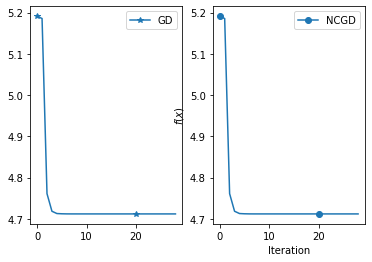

In [104]:
val = [res1,res2]
labels = ['GD','NCGD']
markers = ['*', 'o']
figure,axis = plt.subplots(1,2)
for i in range(len(val)):
    axis[i].plot(val[i],label = labels[i],
        marker=markers[i], markevery=20)
    axis[i].legend()
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.show()